In [4]:
import sqlite3
import pandas as pd

q1 = "SELECT * FROM sqlite_master WHERE type='table'"
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
cursor.execute(q1).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [3]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


# Summary statistics

In [4]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [5]:
#Minimum population
q3 = "select name country, min(population) from facts"
pd.read_sql_query(q3, conn)

,country,min(population)
0,Antarctica,0


Note: it easily understands that the area with minimum population is antarctica, 0 person, where the weather is very severe. 

In [6]:
#Maximum population
q4 = "select name country, max(population) from facts"
pd.read_sql_query(q4, conn)

,country,max(population)
0,World,7256490011


Note: the highest population area is ,of course, the world population

In [7]:
#Minimum population growth
q5 = "select name country, min(population_growth) from facts"
pd.read_sql_query(q5, conn)

,country,min(population_growth)
0,Holy See (Vatican City),0.0


In [8]:
#Maximum population growth
q6 = "select name country, max(population_growth) from facts"
pd.read_sql_query(q6, conn)

,country,max(population_growth)
0,South Sudan,4.02


# Histograms

/Users/phuongphuc/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118acdb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118c83898>]], dtype=object)

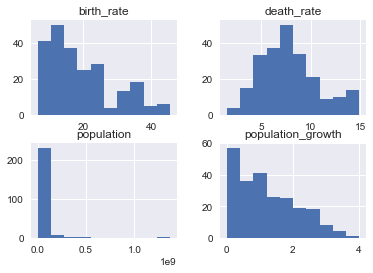

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

q7 = '''
select name, population, population_growth, birth_rate, death_rate from facts 
where name != 'Antarctica' and name != 'World'
'''
pd.read_sql_query(q7, conn).hist(ax=ax)
